**Group-08**<br/>
<font style="color:red"> **Belhassen Ghoul <br/> Robin Ehrensperger <br/> Dominic Diedenhofen**</font>

<font style="color:green"><h1>Exercise 3 CNN on CIFAR10</h1></font>


<font style="color:green"><h2>Simple CNN</h2></font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
import tensorflow as tf
from keras.layers import Dense,Flatten
from keras.layers.convolutional import Conv2D
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.regularizers import l2

In [2]:
#load and split data
(xTrain,yTrain),(xTest,yTest) = cifar10.load_data()
xTrain.shape

(50000, 32, 32, 3)

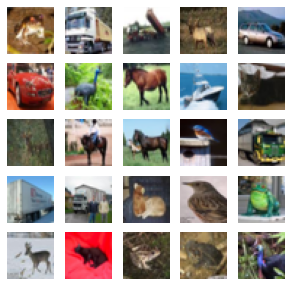

In [3]:
fig, axs = plt.subplots(5,5,figsize=(5,5))
cnt = 0
for i in range(5):
    for j in range(5):
        axs[i,j].imshow(xTrain[cnt])
        axs[i,j].axis("off")
        cnt+=1
plt.show()

In [4]:
xTrain = xTrain.astype("float32")/255
xTest = xTest.astype("float32")/255

nClasses = 10
yTrain =to_categorical(yTrain,nClasses)
yTest = to_categorical(yTest,num_classes=nClasses)
print(yTrain[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


<font style="color:red">simple CNN model --> 64.6% </font>

In [5]:
nepochs = 50
batchSize = 128
inputShape = (32,32,3)

model = Sequential()
model.add(Conv2D(32, kernel_size=3, padding='same',input_shape=inputShape,activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 10)                81930     
                                                                 
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
log = model.fit(xTrain,yTrain,batch_size=batchSize,epochs=nepochs,validation_data=(xTest,yTest))

Epoch 1/50
391/391 [==============================] - 4s 4ms/step - loss: 1.5981 - accuracy: 0.4421 - val_loss: 1.3821 - val_accuracy: 0.5170
Epoch 2/50
391/391 [==============================] - 1s 3ms/step - loss: 1.2932 - accuracy: 0.5499 - val_loss: 1.2458 - val_accuracy: 0.5653
Epoch 3/50
391/391 [==============================] - 1s 3ms/step - loss: 1.1936 - accuracy: 0.5882 - val_loss: 1.2081 - val_accuracy: 0.5785
Epoch 4/50
391/391 [==============================] - 1s 3ms/step - loss: 1.1272 - accuracy: 0.6132 - val_loss: 1.1520 - val_accuracy: 0.5963
Epoch 5/50
391/391 [==============================] - 1s 3ms/step - loss: 1.0777 - accuracy: 0.6299 - val_loss: 1.1432 - val_accuracy: 0.6048
Epoch 6/50
391/391 [==============================] - 1s 3ms/step - loss: 1.0317 - accuracy: 0.6484 - val_loss: 1.1049 - val_accuracy: 0.6189
Epoch 7/50
391/391 [==============================] - 1s 3ms/step - loss: 0.9928 - accuracy: 0.6608 - val_loss: 1.0957 - val_accuracy: 0.6238
Epoch 

In [7]:
lossTest, metricTest = model.evaluate(xTest,yTest, verbose=0)
lossTest,metricTest

(1.1791791915893555, 0.6460999846458435)

<font style="color:green"><h2>Deeper CNN</h2></font>

In [19]:
nepochs = 100
batchSize = 128
inputShape = (32,32,3)

model = Sequential()
model.add(Conv2D(32, kernel_size=3, padding='same',input_shape=inputShape,activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(Conv2D(32, kernel_size=3, padding='same',activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.MaxPooling2D(pool_size=2))

model.add(Conv2D(64, kernel_size=3, padding='same',activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(Conv2D(64, kernel_size=3, padding='same',activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.MaxPooling2D(pool_size=2))

model.add(Conv2D(128, kernel_size=3, padding='same',activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(Conv2D(128, kernel_size=3, padding='same',activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))


model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_13 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_7 (Dropout)         (None, 32, 32, 32)       

In [20]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
log = model.fit(xTrain,yTrain,batch_size=batchSize,epochs=nepochs,validation_data=(xTest,yTest))

Epoch 1/100
391/391 [==============================] - 9s 22ms/step - loss: 1.6424 - accuracy: 0.4561 - val_loss: 3.2550 - val_accuracy: 0.1940
Epoch 2/100
391/391 [==============================] - 8s 21ms/step - loss: 1.1078 - accuracy: 0.6129 - val_loss: 1.2454 - val_accuracy: 0.6035
Epoch 3/100
391/391 [==============================] - 8s 21ms/step - loss: 0.8756 - accuracy: 0.6943 - val_loss: 0.9907 - val_accuracy: 0.6735
Epoch 4/100
391/391 [==============================] - 8s 21ms/step - loss: 0.7500 - accuracy: 0.7388 - val_loss: 0.8337 - val_accuracy: 0.7148
Epoch 5/100
391/391 [==============================] - 8s 21ms/step - loss: 0.6684 - accuracy: 0.7691 - val_loss: 0.9178 - val_accuracy: 0.7032
Epoch 6/100
391/391 [==============================] - 8s 21ms/step - loss: 0.6085 - accuracy: 0.7884 - val_loss: 0.8514 - val_accuracy: 0.7230
Epoch 7/100
391/391 [==============================] - 8s 21ms/step - loss: 0.5537 - accuracy: 0.8062 - val_loss: 0.9411 - val_accuracy:

In [22]:
lossTest, metricTest = model.evaluate(xTest,yTest, verbose=0)
lossTest,metricTest

(0.7209146618843079, 0.8348000049591064)

In [23]:
lossTrain, metricTrain = model.evaluate(xTrain,yTrain, verbose=0)
lossTrain, metricTrain

(0.03864597901701927, 0.9870399832725525)

| CNN | Architecture                                                                                 | Acc. train % | Acc. test % | Comment          |
|-----|----------------------------------------------------------------------------------------------|--------------|-------------|------------------|
| 1   | INPUT -> [[CONV -> RELU]*2 -> POOL?]*3 -> [Flatten -> FC -> sigmoid]                         |     98.2     |     76.2    |    Overfitting   |
| 2   | INPUT -> [[CONV -> RELU -> BatchNorm]*2 -> POOL?]*3 -> [Flatten -> FC -> sigmoid]            |     99.2     |      80     | less Overfitting |
| 3   | INPUT -> [[CONV -> RELU -> BatchNorm -> Dropout]*2 -> POOL?]*3 -> [Flatten -> FC -> sigmoid] |     98.7     |     83.4    |  double nepochs  |